In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

## Content

- [Description of problem](#Description-of-problem-domain)
- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
  - [Numerical Data](#Numerical-Data)
  - [Categorical Data](#Categorical-Data)

### Description of problem

In [2]:
creditcard_df = pd.read_csv('Marketing_data.csv')#open and reading a csv

In [3]:
creditcard_df.shape#checking size of the dataframe

(8950, 18)

In [54]:
creditcard_df.head() #seeing the first 5 rows

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
creditcard_df.info()#printing summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe()##looking at the five-number summary  of Statistic

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]#########

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [9]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760]##############

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### Exploratory Data Analysis (EDA)¶

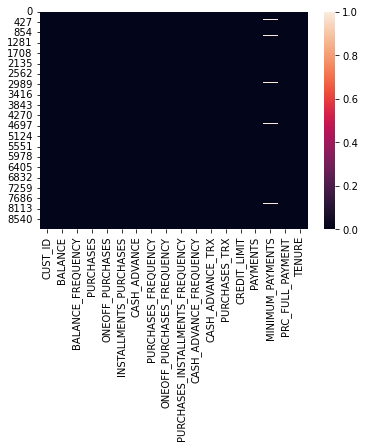

In [10]:
# Visualization of the missing values.
sns.heatmap(creditcard_df.isnull());

In [11]:
creditcard_df.isnull().sum()# Checking missing values.

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
creditcard_df['MINIMUM_PAYMENTS'].mean()# Checking mean of the column with missing Values= 'MINIMUM_PAYMENTS'

864.2065423050816

In [13]:
# Localizing the missing values in the column 'MINIMUM_PAYMENTS' and overwriting the mean of the column
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [14]:
#Checking the mean of the column with missing Values= 'CREDIT_LIMIT'
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [15]:
# Localizing the missing values in the column 'CREDIT_LIMIT and overwriting the mean of the column
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [16]:
# Checking missing values after the overwriting using mean
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

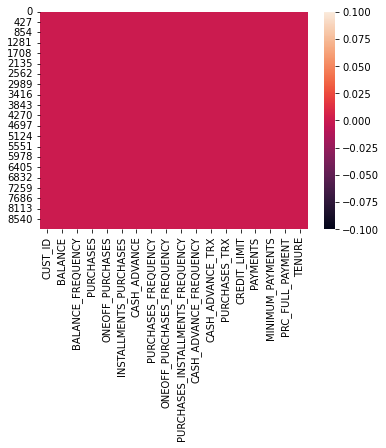

In [17]:
# Visualization of the missing values after the overwriting using mean
sns.heatmap(creditcard_df.isnull());

In [18]:
## Checking duplicated information
creditcard_df.duplicated().sum()

0

In [19]:
#dropping 'CUST_ID'columns
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [55]:
creditcard_df.head()#looking at first 5 rows  after dropping ID column

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
creditcard_df.columns#looking at the columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [22]:
len(creditcard_df.columns)#It has 17 column

17

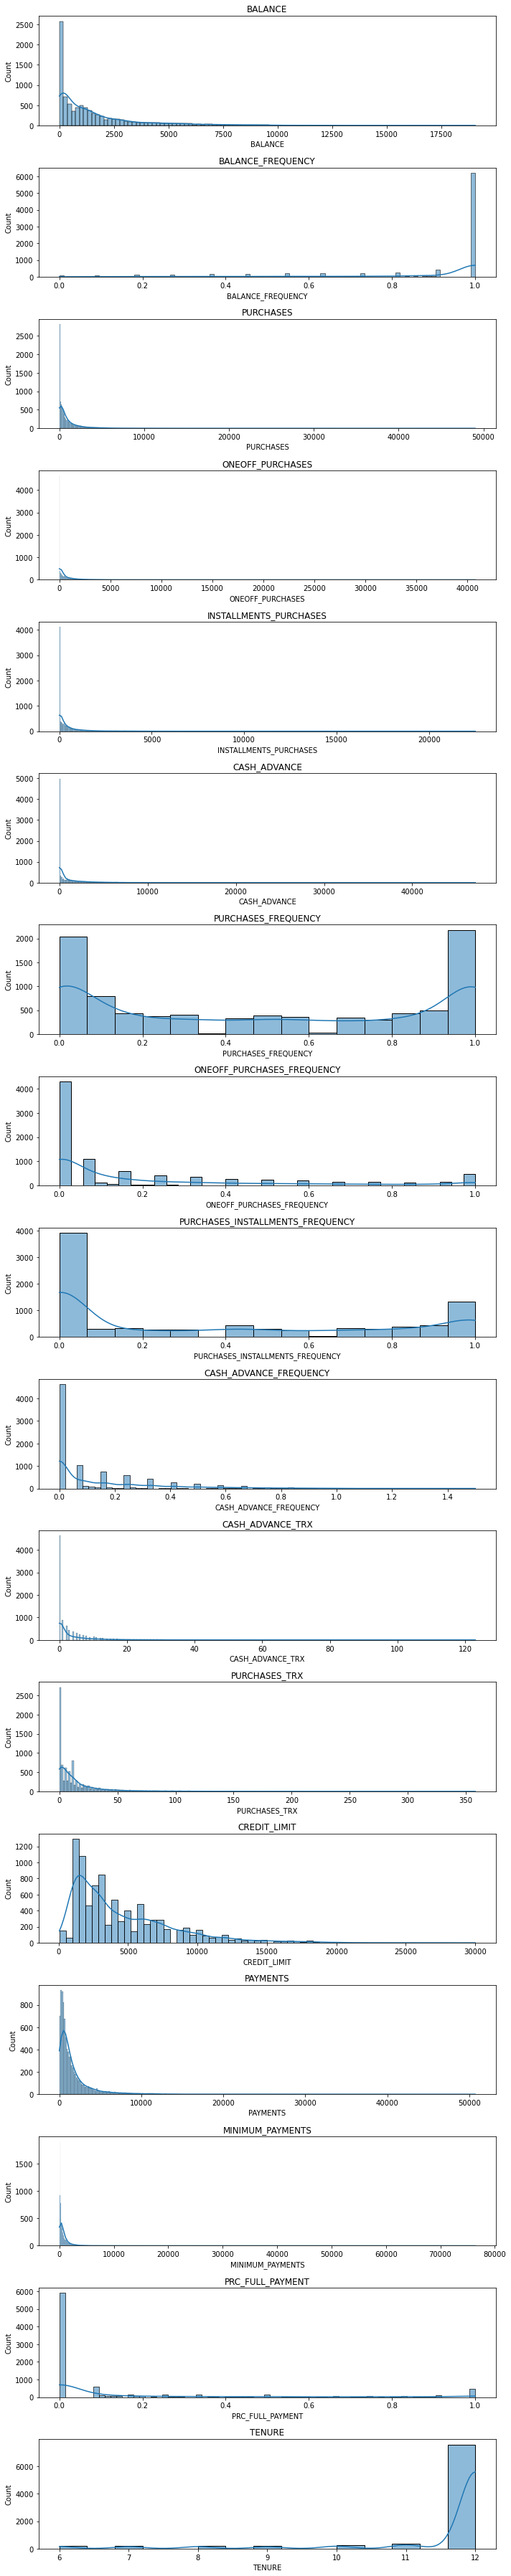

In [59]:
## plotting the distribution of each column
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.histplot(creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

In [24]:
## checking the Pearson correlation
correlations = creditcard_df.corr()

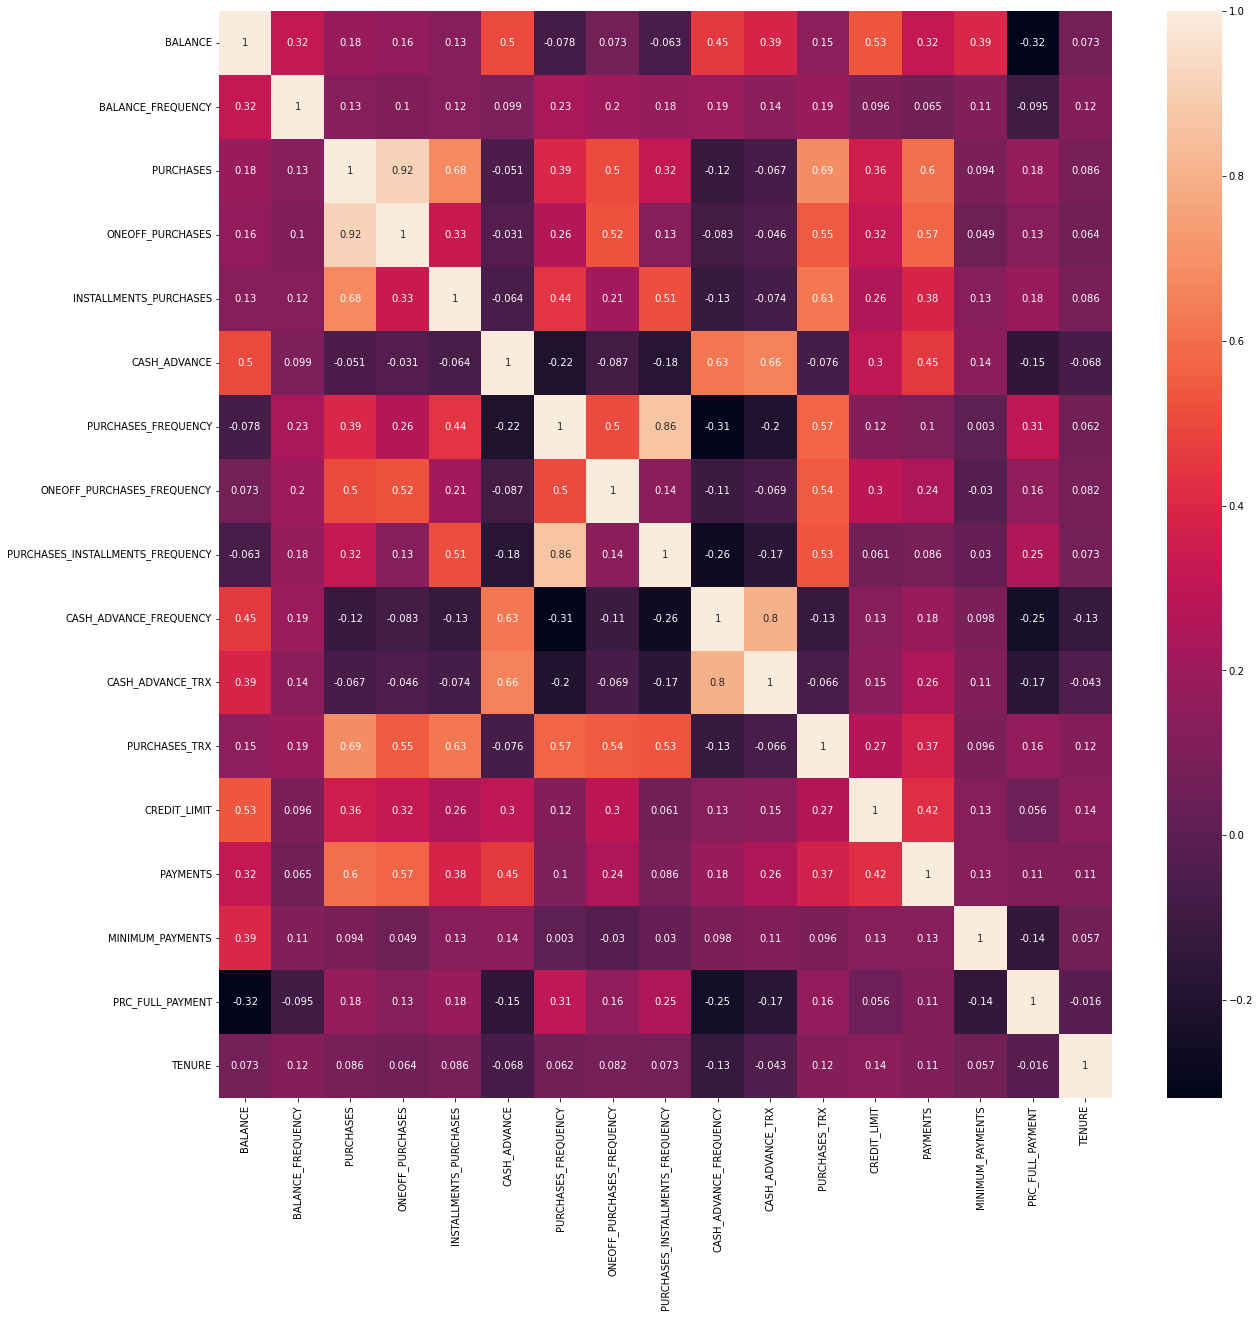

In [25]:
## Plotting the Heatmap
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

## Defining the quantity of clusters using the Elbow Method

In [26]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE']) #The difference in scale is to big. We need to use a scaler to put on the same scaler.

(0.0, 19043.13856)

In [27]:
#Let's use the Standard Scaler
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [28]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [29]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [30]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [31]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [32]:
print(wcss_1)

[152150.00000000006, 127784.76013810438, 111986.69806610128, 99073.93763633879, 91502.98259428905, 84852.45300468434, 79527.50044752898, 75190.45423677708, 69857.17800655948, 66608.96020779744, 63633.1080384814, 61357.32488173997, 59174.06296169481, 57468.17520021152, 55860.66206071716, 54641.774280284495, 53018.06213142508, 51757.76733687591, 50571.21784611041]


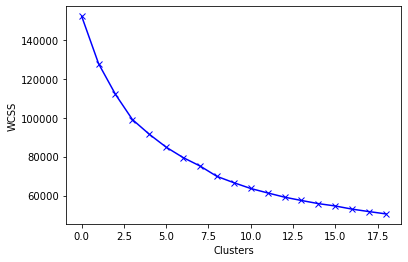

In [33]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

## Segmentation with k-means

In [34]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [35]:
labels, len(labels)

(array([0, 5, 2, ..., 3, 0, 1]), 8950)

In [36]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([2924, 1295, 1197, 2161,  359,  951,   38,   25], dtype=int64))

In [37]:
kmeans.cluster_centers_

array([[-1.41242609e-02,  3.71018192e-01, -3.58730462e-01,
        -2.41658184e-01, -4.04142454e-01, -8.15564670e-02,
        -8.64075438e-01, -3.96454769e-01, -7.66404990e-01,
         1.38047641e-01, -2.51361022e-02, -4.87406351e-01,
        -3.41385761e-01, -2.66776380e-01, -5.74442312e-02,
        -4.54106366e-01, -5.01886079e-03],
       [-6.98251662e-01, -2.13575139e+00, -3.17912128e-01,
        -2.36484868e-01, -3.17132196e-01, -3.07083114e-01,
        -5.65645949e-01, -4.34099792e-01, -4.60844808e-01,
        -4.84484630e-01, -3.60538411e-01, -4.27701825e-01,
        -2.14852301e-01, -2.23343915e-01, -2.55402064e-01,
         2.51564164e-01, -1.63831836e-01],
       [-1.23542994e-01,  3.93608707e-01,  5.19501225e-01,
         6.42247758e-01,  4.82395822e-02, -3.27972534e-01,
         9.64823244e-01,  1.84580292e+00,  1.85304011e-01,
        -4.06488461e-01, -3.30514074e-01,  6.02226447e-01,
         4.30277258e-01,  1.28674356e-01, -1.56747095e-01,
         4.10882934e-01,  2.0

In [38]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.014124,0.371018,-0.358730,-0.241658,-0.404142,-0.081556,-0.864075,-0.396455,-0.766405,0.138048,-0.025136,-0.487406,-0.341386,-0.266776,-0.057444,-0.454106,-0.005019
1,-0.698252,-2.135751,-0.317912,-0.236485,-0.317132,-0.307083,-0.565646,-0.434100,-0.460845,-0.484485,-0.360538,-0.427702,-0.214852,-0.223344,-0.255402,0.251564,-0.163832
2,-0.123543,0.393609,0.519501,0.642248,0.048240,-0.327973,0.964823,1.845803,0.185304,-0.406488,-0.330514,0.602226,0.430277,0.128674,-0.156747,0.410883,0.207608
3,-0.399268,0.307008,-0.061386,-0.256211,0.325515,-0.362142,0.982671,-0.409552,1.176331,-0.460903,-0.357009,0.137210,-0.321063,-0.243940,-0.108204,0.361539,-0.030238
4,1.017717,0.467735,2.473527,1.826892,2.492386,-0.155811,1.164234,1.581560,1.269314,-0.277598,-0.145446,3.100632,1.283959,1.443839,0.373143,0.261577,0.337784
5,1.564294,0.371674,-0.232178,-0.164511,-0.246813,1.942772,-0.484057,-0.213125,-0.430763,1.910154,1.846363,-0.281259,0.954170,0.735930,0.343332,-0.391452,-0.101152
6,1.423475,0.457490,-0.000842,-0.219544,0.400645,0.237548,0.022552,-0.448103,0.222215,-0.143346,0.067656,0.212830,0.093020,0.080160,11.412424,-0.525551,0.301687
7,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900


* Grupo 0 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

* Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito

* Grupo 5: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)

* Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863)

In [39]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1535.076371,0.965162,236.771672,191.334282,45.606638,807.843391,0.143555,0.084188,0.059848,0.162769,3.077291,2.594733,3252.348381,960.852370,730.335185,2.089632e-02,11.510602
1,111.122933,0.371331,323.980672,199.920927,124.288934,334.903477,0.263329,0.072957,0.181286,0.038194,0.788417,4.078764,3712.728876,1086.585101,269.002806,2.272929e-01,11.298069
2,1307.330514,0.970513,2113.127207,1658.437107,454.690100,291.097389,0.877581,0.753096,0.438082,0.053802,0.993311,29.678930,6059.974156,2105.643505,498.914050,2.738909e-01,11.795151
3,733.432107,0.949998,872.053648,167.179569,705.426523,219.441857,0.884744,0.080280,0.831941,0.042913,0.812500,18.120370,3326.290918,1026.960966,612.041990,2.594587e-01,11.476852
4,3682.767326,0.988073,6287.933175,3624.703398,2664.901086,652.128769,0.957614,0.674268,0.868895,0.079594,2.256267,91.779944,9166.016713,5912.916365,1733.800279,2.302215e-01,11.969359
5,4820.421159,0.965317,507.153977,319.383284,187.877377,5052.954253,0.296075,0.138878,0.193241,0.517385,15.848898,7.718783,7966.111800,3863.590247,1664.326948,3.922172e-02,11.381952
6,4527.317582,0.985646,1001.405789,228.040000,773.365789,1477.020451,0.499402,0.068780,0.452751,0.106459,3.710526,20.000000,4832.894737,1965.198711,27460.379340,-2.775558e-17,11.921053
7,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,4.907576e-01,11.920000


In [40]:
labels, len(labels)

(array([0, 5, 2, ..., 3, 0, 1]), 8950)

In [41]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


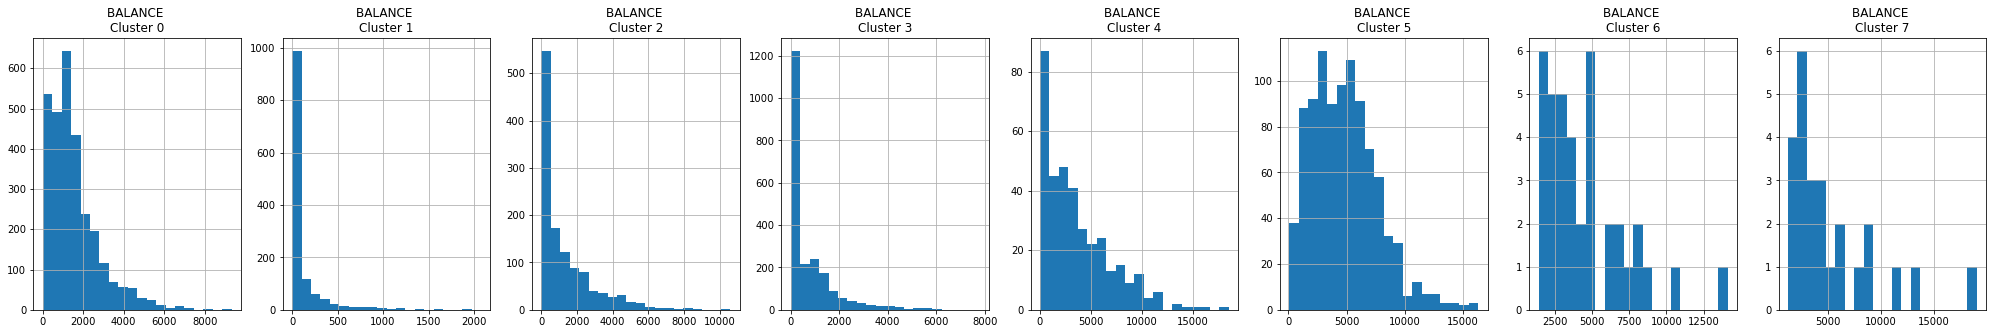

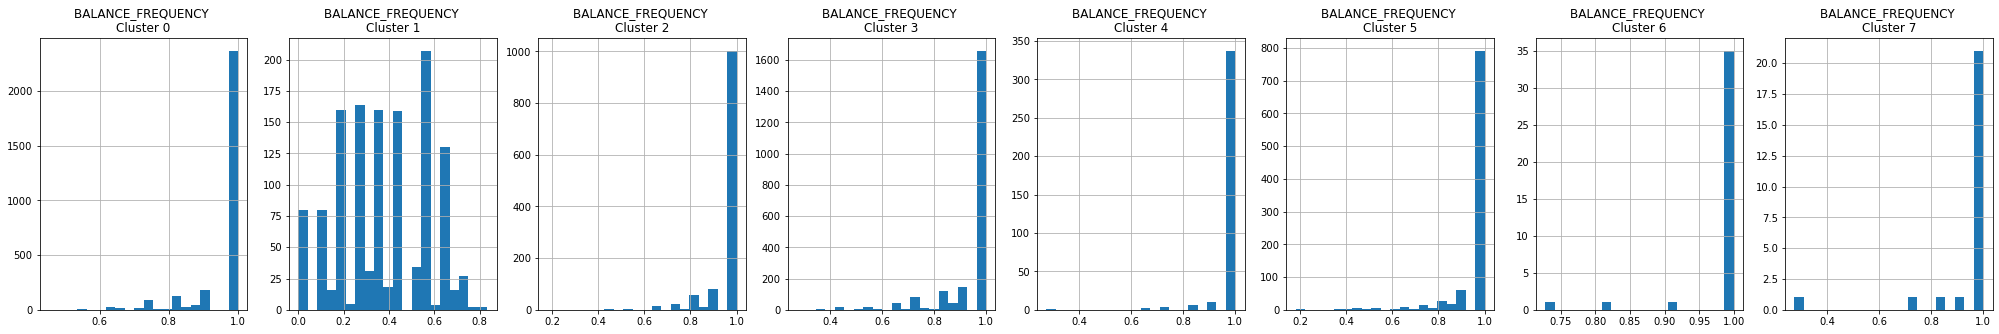

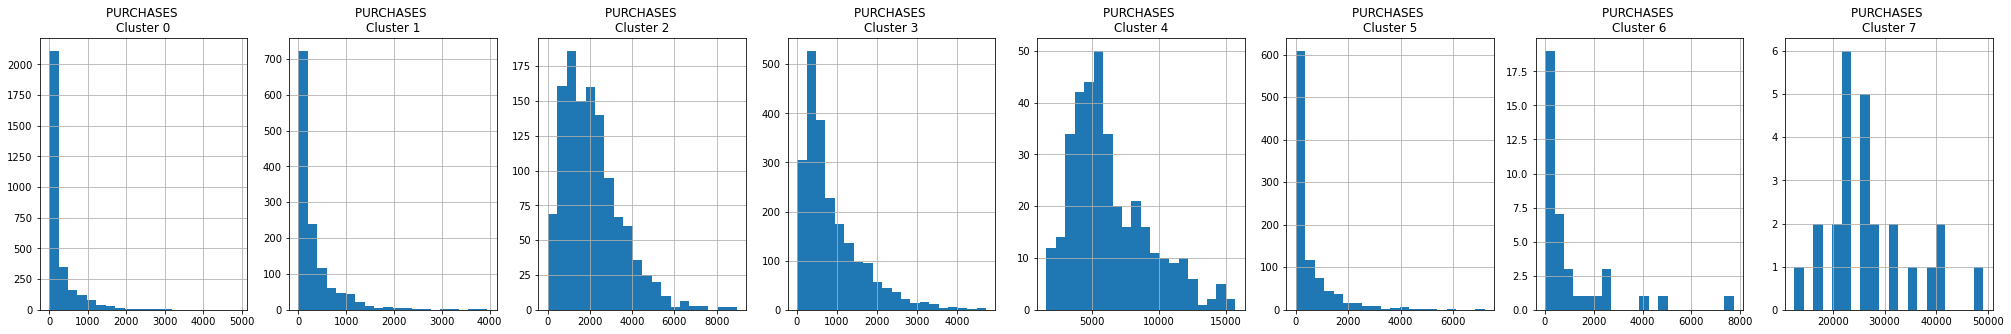

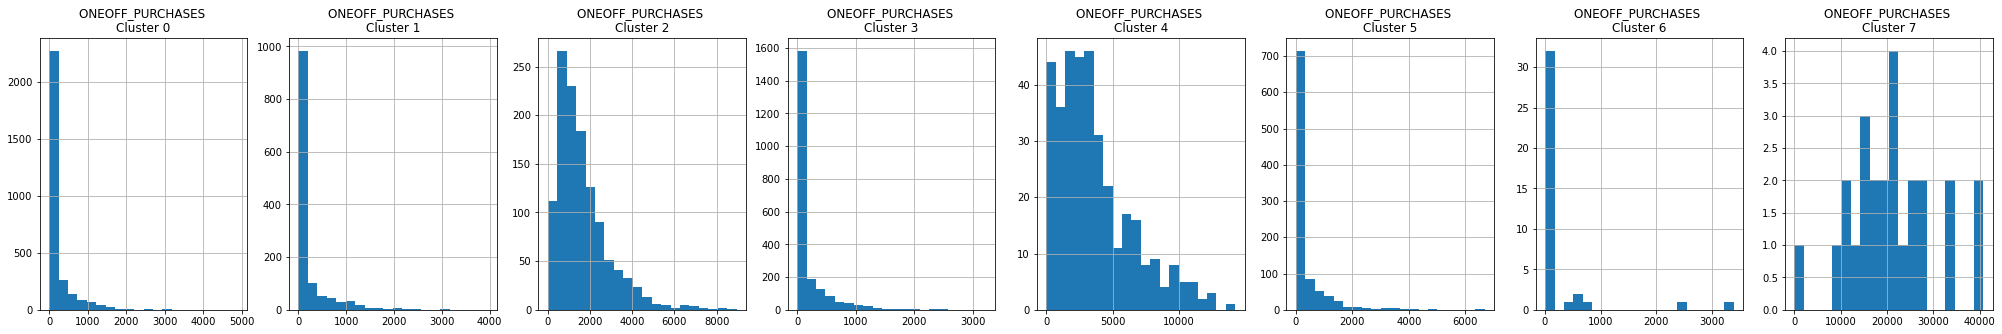

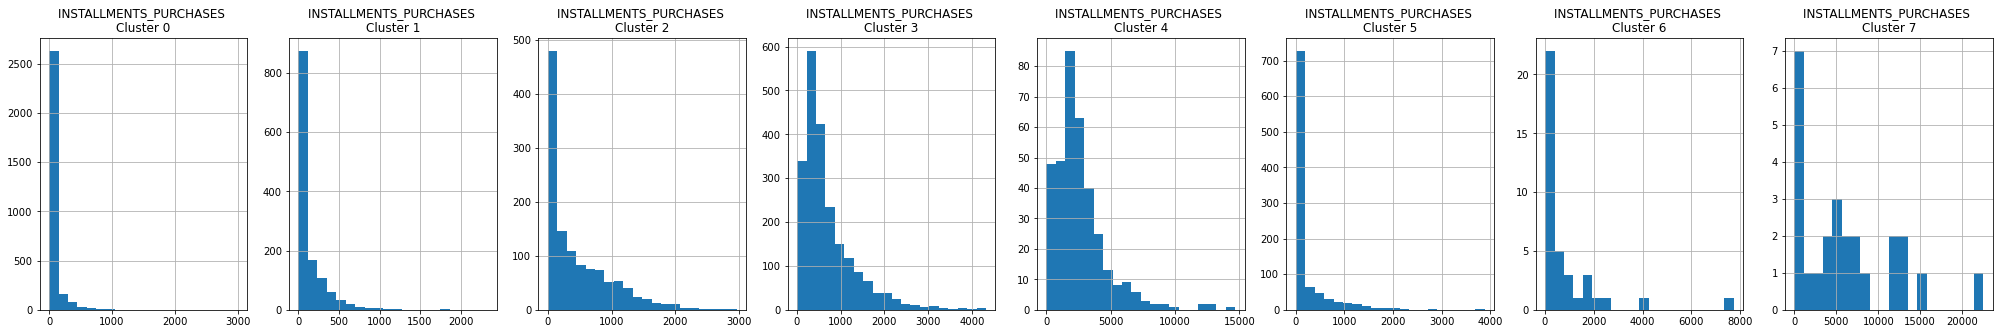

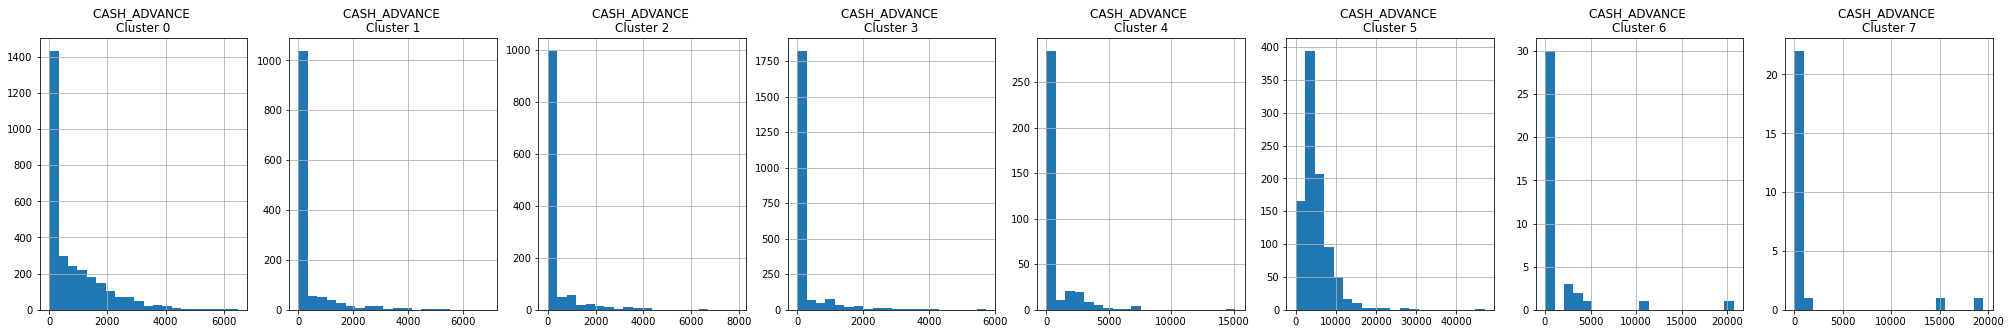

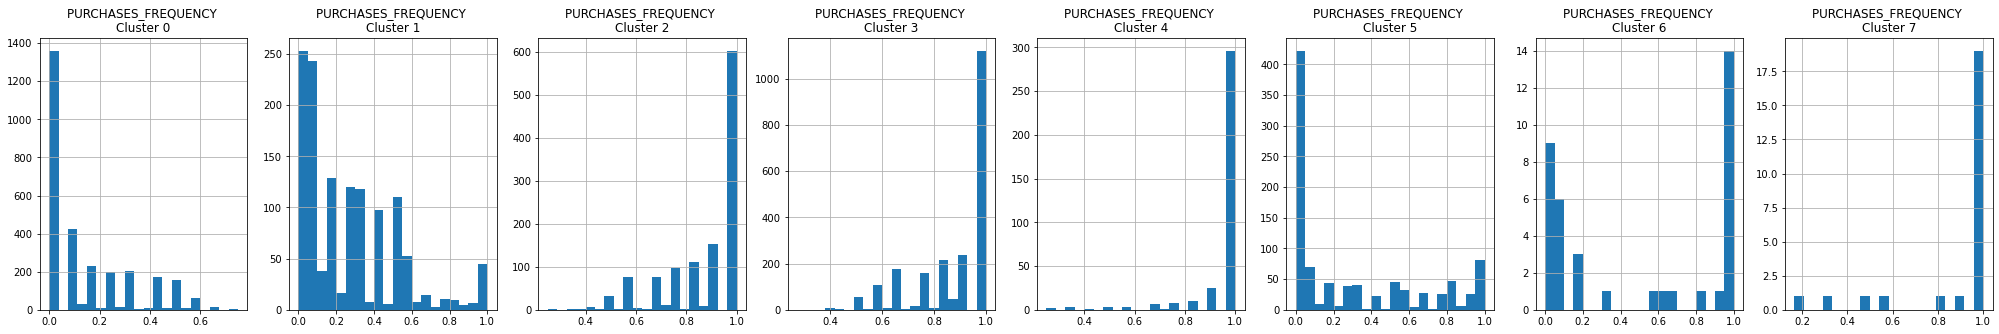

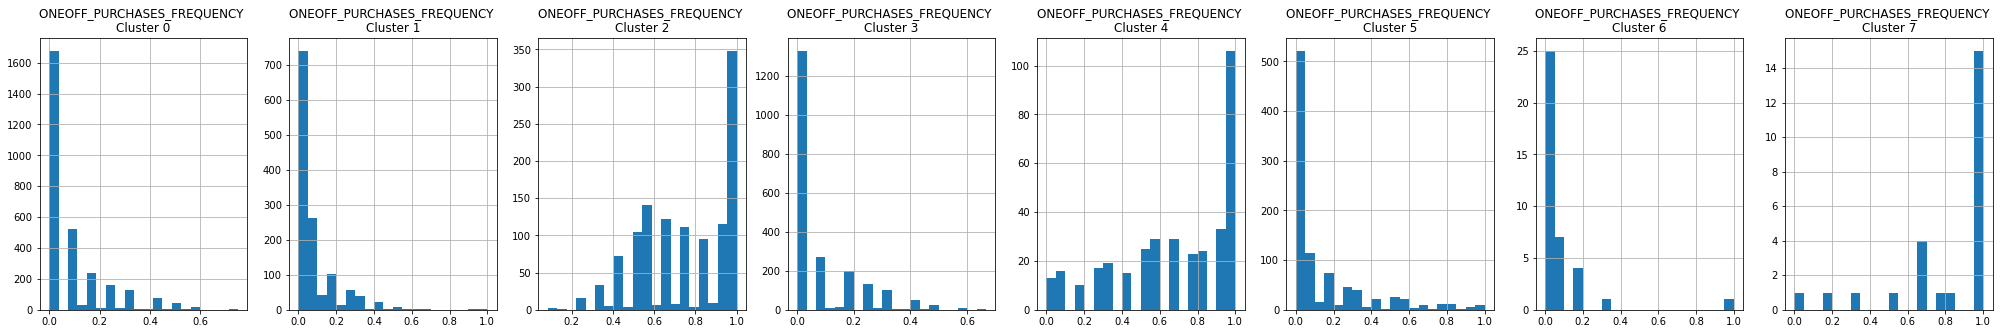

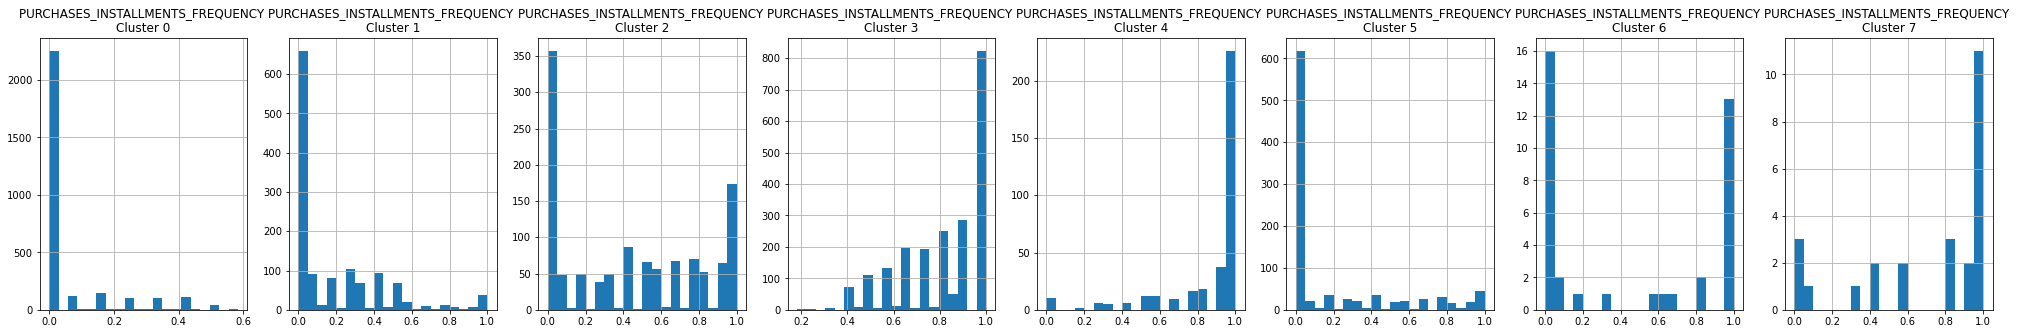

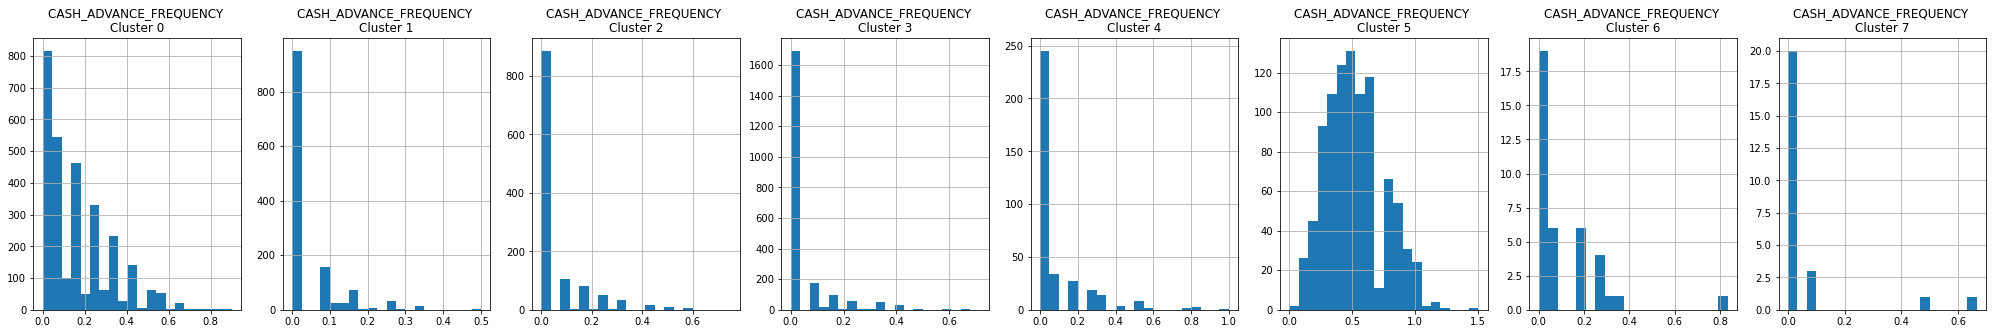

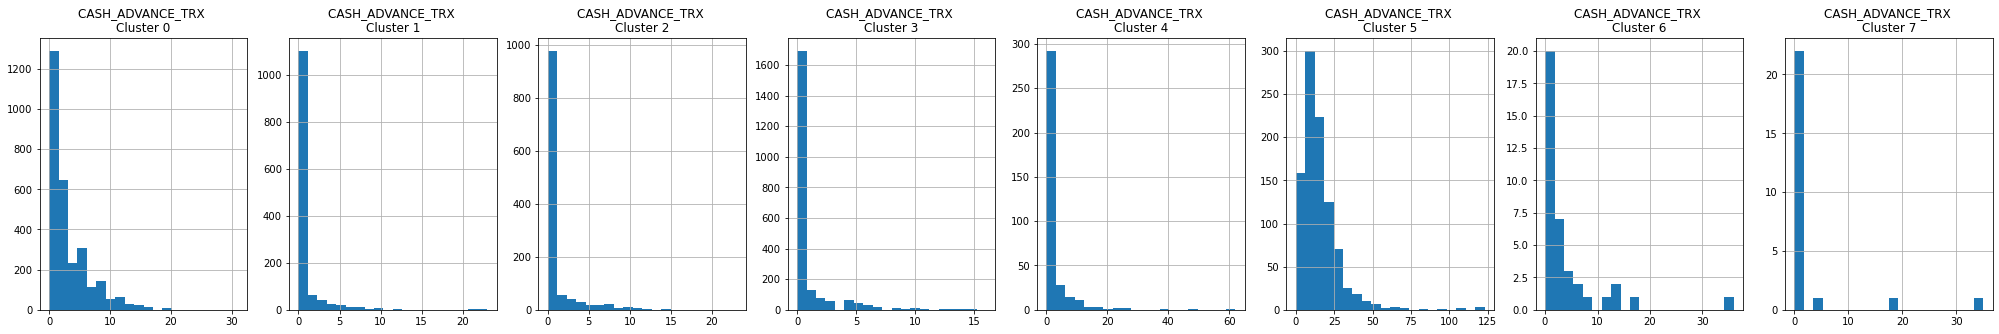

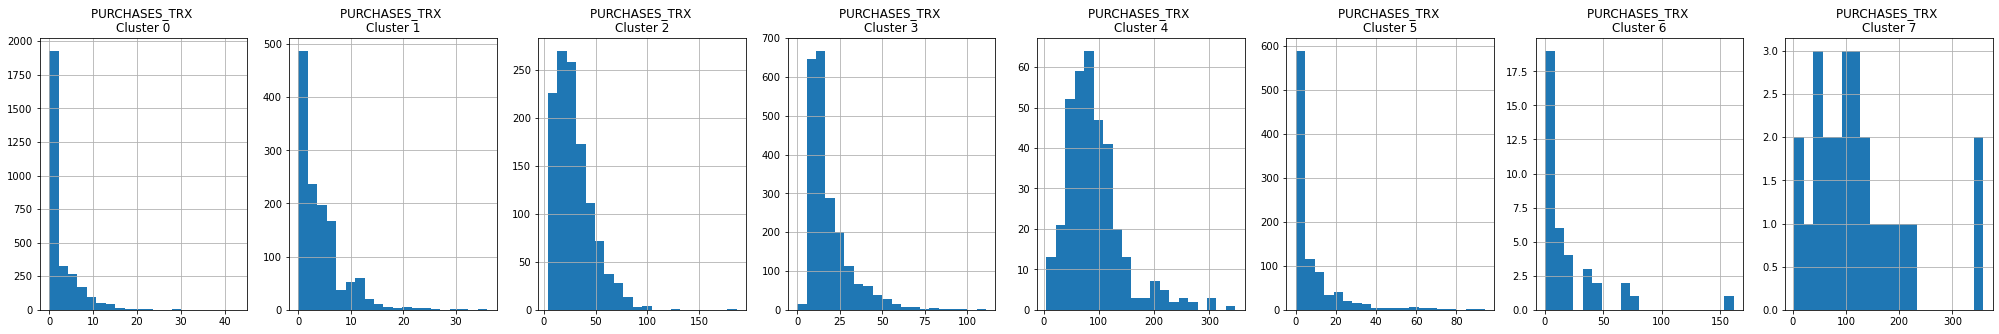

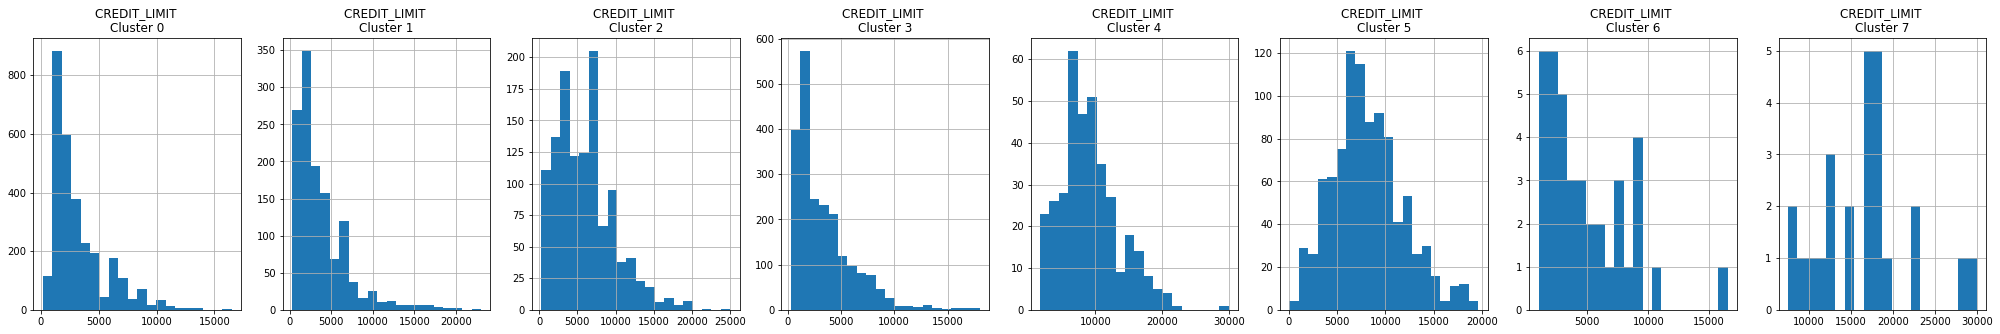

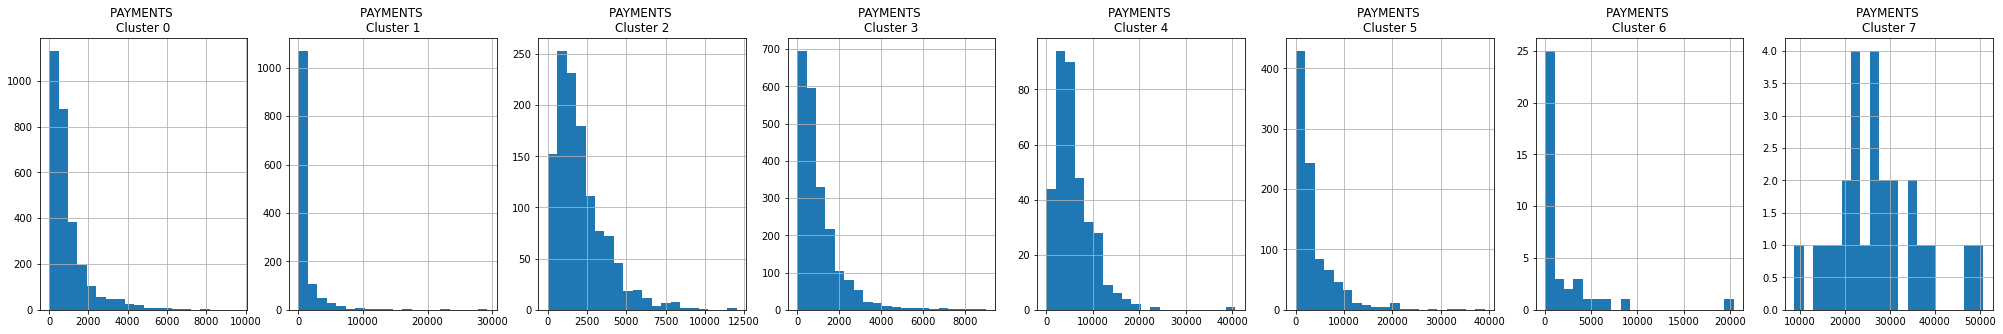

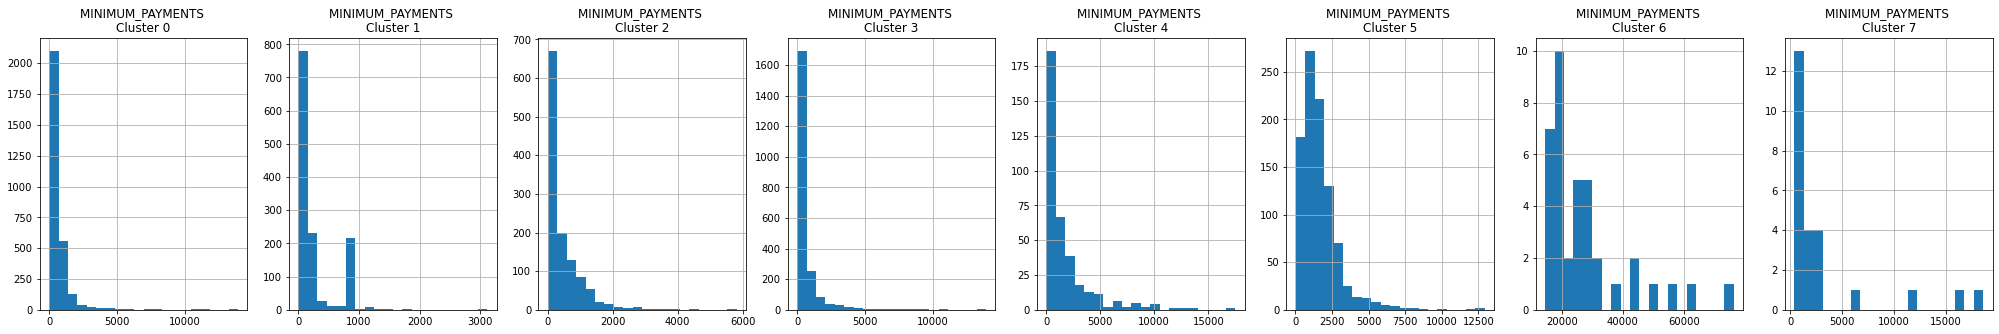

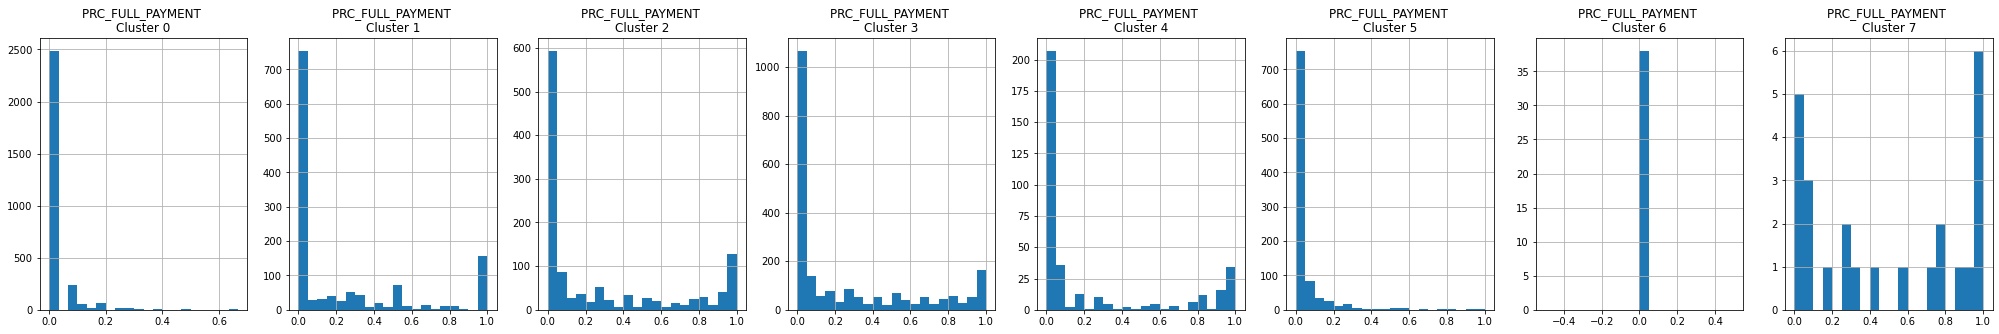

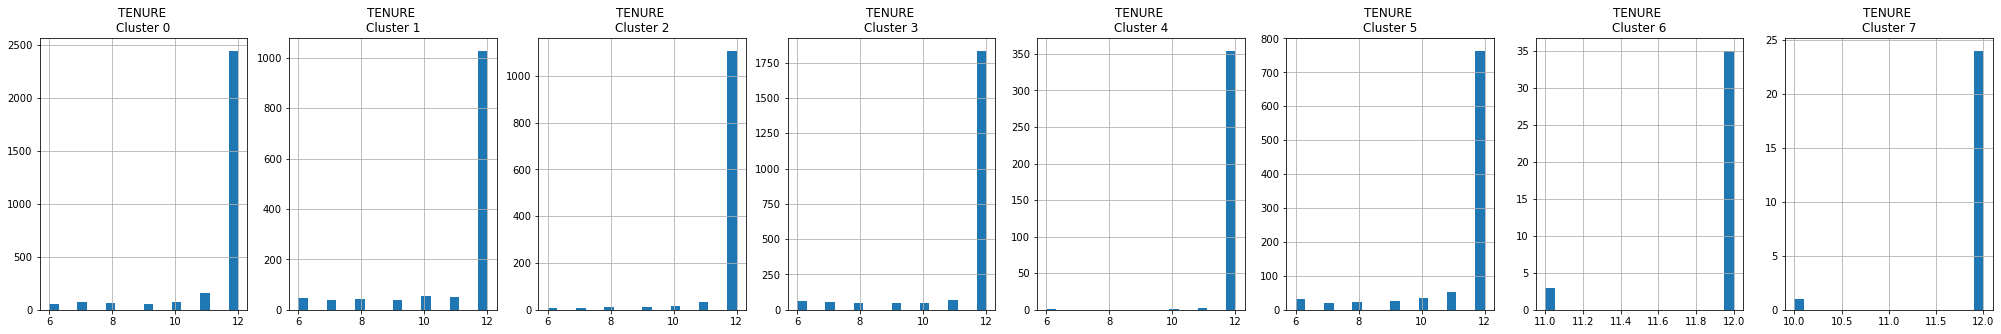

In [42]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [43]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0,95.40,0.000000,0.166667,0.0,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
4423,158.919439,1.000000,0.00,0.0,0.00,787.758817,0.000000,0.0,0.000000,0.250000,3,0,4400.0,554.846112,173.790575,0.0,12,0
4425,3632.344231,1.000000,83.45,0.0,83.45,1136.000468,0.250000,0.0,0.250000,0.166667,2,3,7000.0,837.430224,1596.597441,0.0,12,0
4429,1215.047947,1.000000,0.00,0.0,0.00,204.182088,0.000000,0.0,0.000000,0.166667,2,0,1500.0,315.553886,315.206825,0.0,12,0
4431,508.598624,1.000000,0.00,0.0,0.00,950.084436,0.000000,0.0,0.000000,0.083333,1,0,11500.0,974.764661,217.361776,0.0,12,0


In [44]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1641,3454.094319,1.0,31299.35,19064.30,12235.05,0.0,1.0,0.666667,0.833333,0.0,0,121,7500.0,22542.58705,1193.031030,0.583333,12,7
3937,2997.977825,1.0,35131.16,34087.73,1043.43,0.0,1.0,1.000000,0.833333,0.0,0,344,12000.0,28896.66522,767.014180,0.750000,12,7
3652,8700.079439,1.0,20421.59,16864.56,3557.03,0.0,1.0,1.000000,1.000000,0.0,0,204,17000.0,13002.30393,2746.592199,0.083333,12,7
1585,8809.504736,1.0,25378.36,20646.07,4732.29,0.0,1.0,1.000000,1.000000,0.0,0,136,14500.0,25825.32482,2921.628286,0.000000,12,7
941,2072.457624,1.0,17409.21,11263.17,6146.04,0.0,1.0,1.000000,1.000000,0.0,0,175,19500.0,19517.16160,517.324081,0.333333,12,7


In [45]:
credit_ordered.to_csv('cluster.csv')

## PCA implementation (principal component analysis) and visualization of the results

In [46]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222262, -1.0764542 ],
       [-1.13829222,  2.50647394],
       [ 0.96968667, -0.38353512],
       ...,
       [-0.92620792, -1.81078871],
       [-2.33655668, -0.65795938],
       [-0.55641764, -0.40045586]])

In [47]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682223,-1.076454
1,-1.138292,2.506474
2,0.969687,-0.383535
3,-0.873629,0.043162
4,-1.599436,-0.688584


In [48]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682223,-1.076454,0
1,-1.138292,2.506474,5
2,0.969687,-0.383535,2
3,-0.873629,0.043162,0
4,-1.599436,-0.688584,0


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

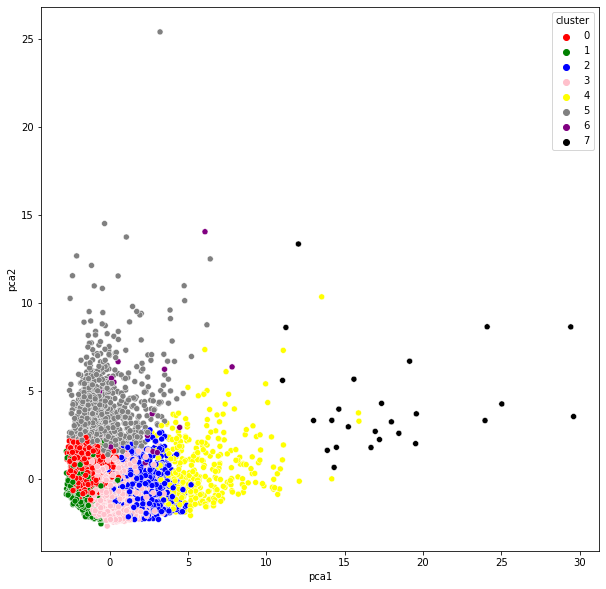

In [49]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

## Aplicação de autoencoders

In [50]:
# 18 -> 10
# Elbow
# K-means
# PCA

In [51]:
creditcard_df_scaled.shape

(8950, 17)

In [52]:
#!pip install tensorflow

In [53]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [ ]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [ ]:
# encoder
encoder = Model(input_df, encoded)

In [ ]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

In [ ]:
creditcard_df_scaled.shape

In [ ]:
compact = encoder.predict(creditcard_df_scaled)

In [ ]:
compact.shape

In [ ]:
creditcard_df_scaled[0]

In [ ]:
compact[0]

In [ ]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

In [ ]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

In [ ]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

In [ ]:
labels = kmeans.labels_
labels, labels.shape

In [ ]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

In [ ]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [ ]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

In [ ]:
df_cluster_ordered.tail()

In [ ]:
df_cluster_ordered.to_excel('cluster_ordereded.xlsx')